In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('daily_offers.xlsx')
print(data.shape)
data.head(3)

(181673, 14)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


### <font color='red'>Train-Test split:</font>

In [ ]:
# selling_price after splitting into train and test set should have same distribution
# It was found that we have to remove extreme outliers to achieve this

indx = np.where(np.isnan(data.selling_price.values) == False)[0] # getting index where selling_price is not nan
np.quantile(data.selling_price.values[indx],[0.25,0.5,0.75,0.9,0.99]) # getting quantile value

array([ 669.,  812.,  953., 1091., 1374.])

In [ ]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format}) # https://stackoverflow.com/a/11528796

np.quantile(data.selling_price.values[indx],np.arange(0.99,1.001,0.001)) # getting quantile value between 0.99 to 1 

array([1374.00, 1385.00, 1398.00, 1415.15, 1440.97, 1467.00, 1501.32,
       1541.99, 1588.76, 1698.00, 100001015.00])

In [ ]:
print(len(data))
data = data[data['selling_price']<2000] # removing row where selling_price>2000
print(len(data))

181673
181630


In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X = data.drop(columns=['selling_price'])
y = data.selling_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=92)

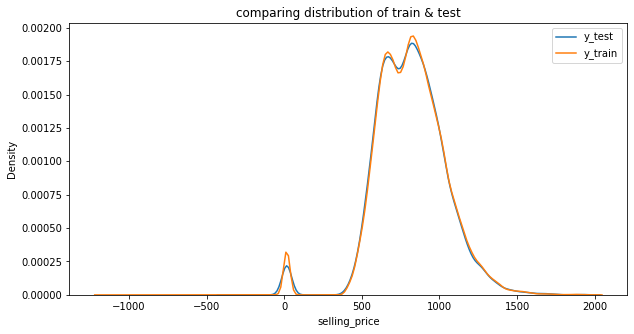

In [ ]:
# we see that after split both sets have same distribution
plt.figure(figsize=(10,5))
sns.kdeplot(x=y_test)
sns.kdeplot(x=y_train)
plt.title('comparing distribution of train & test')
plt.legend(labels=['y_test','y_train'])
plt.show()

In [ ]:
# we see from above plot that that some selling_price values are negative
# sometimes kde plot extends to negative side, so checking..
indx1 = y_train[y_train<0].index
print(y_train[indx1],'\n')
indx2 = y_test[y_test<0].index
print(y_test[indx2])

44865     -25.0
44761    -730.0
28      -1160.0
44810    -445.0
Name: selling_price, dtype: float64 

105189   -336.0
Name: selling_price, dtype: float64


In [ ]:
#removing those rows
X_train = X_train.drop(indx1)
X_test = X_test.drop(indx2)
y_train = y_train.drop(indx1)
y_test = y_test.drop(indx2)

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((163463, 13), (163463,), (18162, 13), (18162,))

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## <font color='red'>EDA</font>:

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163457 entries, 0 to 163456
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             163455 non-null  object 
 1   item_date      163456 non-null  float64
 2   quantity tons  163457 non-null  object 
 3   customer       163456 non-null  float64
 4   country        163434 non-null  float64
 5   status         163455 non-null  object 
 6   item type      163457 non-null  object 
 7   application    163438 non-null  float64
 8   thickness      163456 non-null  float64
 9   width          163457 non-null  float64
 10  material_ref   93363 non-null   object 
 11  product_ref    163457 non-null  int64  
 12  delivery date  163456 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 16.2+ MB


### <font color='blue'>Analysis of feature 'id':</font>

In [ ]:
X_train.iloc[np.where(X_train.id.isna().values==True)[0]] # we have 2 rows where id is nan

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
61656,NaN,20210401.0,15.92799,30271717.0,28.0,To be approved,W,10.0,0.8,1000.0,NaN,611993,20210701.0
136226,NaN,20201113.0,27.096376,30197989.0,27.0,Won,W,59.0,2.8,959.0,HRCL_DD 12 2.8X959,640665,20201201.0


In [ ]:
# we will decide what to do of nan rows after analysis of all features.

In [ ]:
len(X_train) , len(X_train.id.unique()) # we see that we have no repetition of id except nan

(163457, 163456)

<font color='magenta'>Observation:</font>

- This feature will be removed from final input as it is just an unique identification no.

### <font color='blue'>Analysis of feature 'item_date':

In [ ]:
X_train.iloc[np.where(X_train.item_date.isna().values==True)[0]]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
61990,1BA92915-36FC-437A-811C-9DC7BF958EA6,NaN,51.785585,30230331.0,80.0,Lost,S,10.0,0.9,1435.0,NaN,628377,20210101.0


In [ ]:
a,b = np.unique(X_train.item_date.values,return_counts=True)
len(a) # we see we have 253 unique item_dates including nan

253

In [ ]:
# if we assume that item date is date of order/bid 
# then subtracting delivery date value from item_date should give positive no.
delivery_days = X_train['delivery date'].sub(X_train['item_date']).values
len(np.where(delivery_days<0)[0]) # we see 14483 values are negative

14483

One Way ANOVA test:

- Market prices of commodity like steel fluctuates with time. While preparing Offer/Bid this is taken into consideration.

-  So testing through ANOVA test whether this unique 252 date values have any significance to predict selling_price.

In [ ]:
from scipy.stats import f_oneway

def anova_test(feature):
  list_price = X_train[[feature]].join(y_train).groupby(feature).selling_price.apply(list) # getting list of selling prices for every unique value of feature
  s,p=f_oneway(*list_price.values) # calculating statistical value and corresponding p-value
  return list_price, s, p

In [ ]:
list_price, s_itemdate, p =  anova_test('item_date')
s_itemdate , p

(312.24366535672914, 0.0)

<font color='magenta'>Observation:

- After analysing count values of item_date, we have two odd dates: 19950000 and 20191919
- Most of the dates are weekdays.
- Nothing is specific what this date is. It may be date of order/enquiry/bid submission.
- This feature is showing significance. But it will add extra 252 features if one-hot encoded. Decision on it can be taken later after analysing significance of other features.


### <font color='blue'>Analysis of feature 'delivery date':

In [ ]:
X_train.iloc[np.where(X_train['delivery date'].isna().values==True)[0]]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
89894,B9C4BAAE-25C3-468F-B315-63D57FA31C15,20201112.0,100.229137,30349338.0,26.0,Won,S,10.0,1.0,1300.0,NaN,611993,NaN


In [ ]:
a,b = np.unique(data['delivery date'].values,return_counts=True)
print(len(a)) # we have 29 unique delivery dates
a , b # all are first day of a month

29


(array([20190401.00, 20190701.00, 20191001.00, 20200101.00, 20200401.00,
        20200501.00, 20200601.00, 20200701.00, 20200801.00, 20200901.00,
        20201001.00, 20201101.00, 20201201.00, 20210101.00, 20210201.00,
        20210301.00, 20210401.00, 20210501.00, 20210601.00, 20210701.00,
        20210801.00, 20210901.00, 20211001.00, 20211101.00, 20211201.00,
        20212222.00, 20220101.00, 30310101.00, nan]),
 array([    1,     3,     1,   129,    57,    15,    33,  7705,  4866,
         6131, 25385,  7173,  7530, 33026,  7295,  8847, 31955,  9117,
         7005, 21067,  3748,   331,   191,     2,     8,     1,     6,
            1,     1]))

One way ANOVA test:

- Similar to above item_date logic, performing same test here.

In [ ]:
list_price, s_deliverydate, p =  anova_test('delivery date')
s_deliverydate , p

(2489.4002818296885, 0.0)

<font color='magenta'>Observation:

- We have 28 unique delivery date values with all as first day of month

- Based on ANOVA test, this feature is showing more significance than item_date.

- Delivery date may me capturing the varying steel market prices. As of now the actual meaning of this date is not known.

- After providing the evidence of strong statistical significance, we can discuss with client about the purpose of this date.

In [ ]:
# seeing whether difference of item_date and delivry date have any significance
from datetime import datetime 
def days_dif(d1,d2): # https://stackoverflow.com/a/8419655
  d1 = datetime.strptime(str(int(d1)), "%Y%m%d")
  d2 = datetime.strptime(str(int(d2)), "%Y%m%d")
  return abs((d2 - d1).days)

In [ ]:
days_diff = []
item_d = X_train['item_date'].values
deli_d = X_train['delivery date'].values
for i in range(len(X_train)):
  try:
    days_diff.append(days_dif(item_d[i],deli_d[i]))
  except:
    days_diff.append(np.nan)

In [ ]:
X_train['diff'] = days_diff

In [ ]:
len(np.unique(days_diff)) # we get 228 unique values

228

In [ ]:
list_price, s_diffdays, p =  anova_test('diff')
s_diffdays , p # showing some significance. Later we will decide whether to add this feature or not

(116.64437215143529, 0.0)

### <font color='blue'>Analysis of feature 'quantity tons':

In [ ]:
# getting rows where quantity is not float and -ve
def index_notfloat(x):
  index_qty_notfloat = []
  for i in range(len(x)):
    if type(x['quantity tons'][i]) != float or x['quantity tons'][i]<=0:
      index_qty_notfloat.append(i)
  return index_qty_notfloat

index_train = index_notfloat(X_train)
index_test = index_notfloat(X_test)

In [ ]:
X_train = X_train.drop(index_train , axis=0) # removing those rows
y_train = y_train.drop(index_train , axis=0)
X_test = X_test.drop(index_test , axis=0) 
y_test = y_test.drop(index_test , axis=0)

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
def plotting_continuous(feature):
  # pdf of feature
  sns.kdeplot(X_train[feature].values )
  plt.xlabel(feature)
  fea=feature
  plt.title(f'PDF of {fea}')
  plt.show()

  # power transforming to make more gaussian like
  from sklearn.preprocessing import power_transform
  q = power_transform(X_train[feature].values.reshape(-1,1), method='yeo-johnson')
  sns.kdeplot(q.reshape(-1,))
  plt.xlabel(feature)
  plt.title(f'PDF of {fea} after power transform')
  plt.show()

  sns.scatterplot(x=q.reshape(-1,),y=y_train)
  plt.xlabel(f'{fea} (power transformed & standarized)')
  plt.title(f'scatter plot of {fea} and selling_price')
  plt.show()

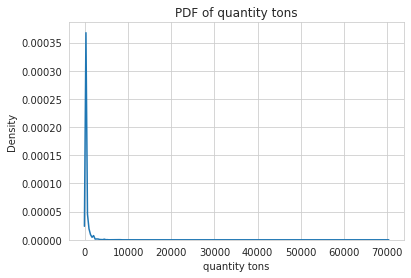

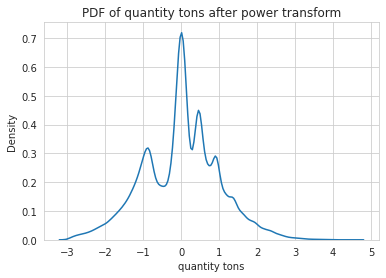

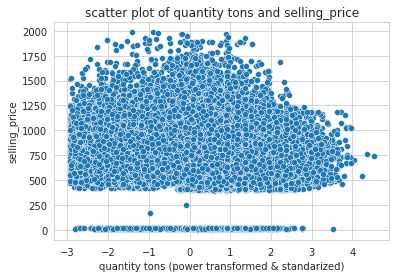

In [ ]:
plotting_continuous('quantity tons')

In [ ]:
np.quantile(X_train['quantity tons'].values, [0,0.25,0.5,0.75,0.9,0.99,1]) # finding quantile value

array([1e-05, 10.948307853118177, 30.349075623366957, 67.03965364534139,
       169.07985591201816, 1108.5115415051766, 70252.36306767857],
      dtype=object)

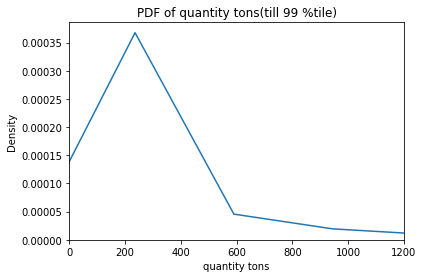

In [ ]:
# pdf of quantity tons till 99 percentile (as above plot is not clear)
sns.kdeplot(X_train['quantity tons'].values )
plt.xlim((0,1200)) # approximating 99 %tile as 1200
plt.xlabel('quantity tons')
plt.title('PDF of quantity tons(till 99 %tile)')
plt.show()
# density values are very low maybe values are densenly populated over wide range

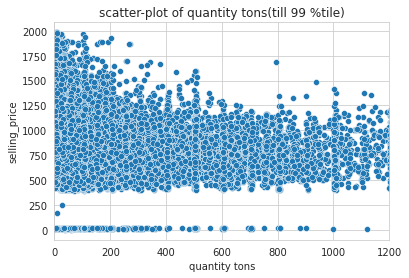

In [ ]:
sns.scatterplot(x=X_train['quantity tons'].values , y=y_train)
plt.xlim((0,1200)) # approximating 99 %tile as 1200
plt.xlabel('quantity tons')
plt.title('scatter-plot of quantity tons(till 99 %tile)')
plt.show()

In [ ]:
from scipy import stats
res = stats.spearmanr(X_train['quantity tons'].values, y_train.values)
res

SignificanceResult(statistic=-0.044064284416526135, pvalue=4.633057473178225e-71)

<font color ='red'>Observation:
- From scatter-plot we see there is some light correlation, as quantity increases the selling price gets into lower range. 

### <font color='blue'>Analysis of feature 'customer':

In [ ]:
X_train.iloc[np.where(X_train.customer.isna().values==True)[0]] #nan value of customer

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,diff
151430,6E764168-3F32-4E5D-BD67-4B1D959C75E3,20201112.0,205.266351,NaN,39.0,Won,W,10.0,3.5,1270.0,NaN,1670798778,20210201.0,81.0


In [ ]:
len(X_train.customer.unique()) # no. of unique cusomers including nan

1167

In [ ]:
# ANOVA test
list_price, s_customer, p =  anova_test('customer')
s_customer , p # showing significance but less compared to others

(74.45852522111484, 0.0)

We have 1166 unique customers. From data many insights can be drawn for each customer. Below we are plotting top 15 customers on the basis of no. of order and order value who has status=Won

In [ ]:
a = X_train[['customer','status']]
a = a[a['status']=='Won']
p,q = np.unique(a.customer.values, return_counts=True)
len(p) # out of 1166 customers 955 customer had status=Won

955

In [ ]:
sort_index=np.argsort(q)[::-1] # sorting customer count who have status=Won

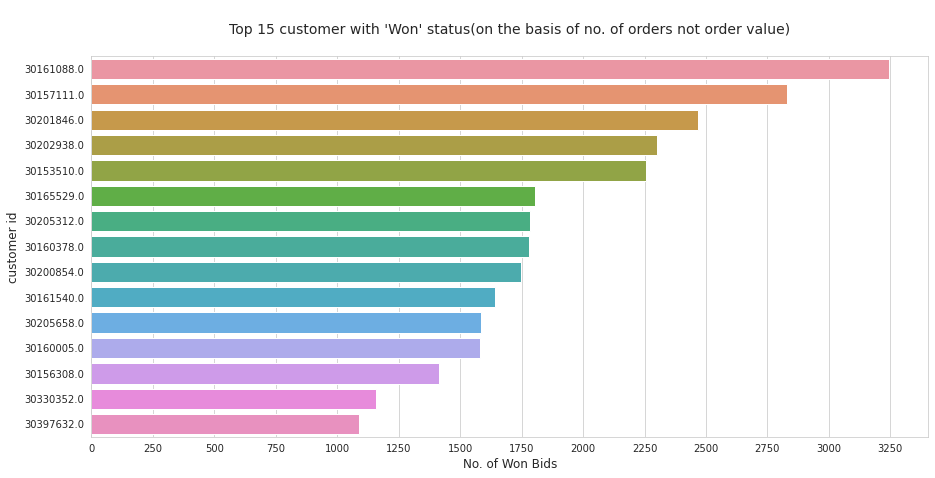

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
sns.barplot(y=p[sort_index[:15]],x=q[sort_index[:15]], order=p[sort_index[:15]], orient='h')
plt.xticks(np.arange(0,3500,250))
plt.xlabel('No. of Won Bids',fontsize=12)
plt.ylabel('customer id',fontsize=12)
plt.title("\nTop 15 customer with 'Won' status(on the basis of no. of orders not order value)\n",fontsize=14)
plt.show()

In [ ]:
custm_sum=[]
for s in list_price.values:
 custm_sum.append(int(np.sum(s)))
sort_index_sum=np.argsort(custm_sum)[::-1]

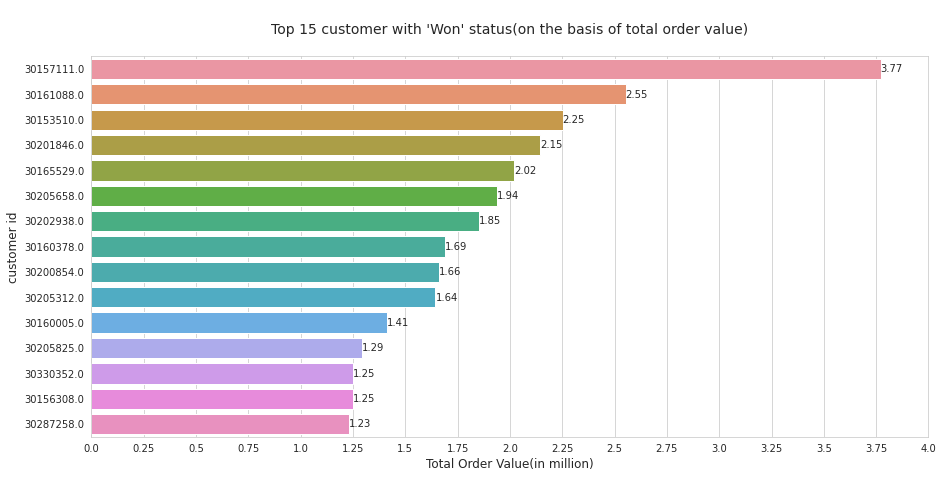

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
#sns.set(rc={'figure.figsize':(15,7)}) #https://stackoverflow.com/a/47955814
#f, ax = plt.subplots()
#ax.ticklabel_format(style='plain', axis='both') #https://stackoverflow.com/a/65053849 #removing scientific notation
ax=sns.barplot(y=list_price.index[sort_index_sum[:15]],x=np.array(custm_sum)[sort_index_sum[:15]], order=list_price.index[sort_index_sum[:15]],orient='h')
ax.bar_label(ax.containers[0],labels=np.around(np.array(custm_sum)[sort_index_sum[:15]]/1e6,2))
plt.xticks(np.arange(0,4.25e6,0.25e6),labels=np.arange(0,4.25e6,0.25e6)/1e6)
plt.xlabel('Total Order Value(in million)',fontsize=12)
plt.ylabel('customer id',fontsize=12)
plt.title("\nTop 15 customer with 'Won' status(on the basis of total order value)\n", fontsize=14)
plt.show()

### <font color='blue'>Analysis of feature 'country':

In [ ]:
a,b = np.unique(X_train.country.values, return_counts=True)

In [ ]:
a,b

(array([ 25.,  26.,  27.,  28.,  30.,  32.,  38.,  39.,  40.,  77.,  78.,
         79.,  80.,  84.,  89., 107., 113.,  nan]),
 array([20972, 24742, 19358, 14225,  7827, 16822,  1551,  3343,  1502,
         8763, 28967,  2437,   728, 11464,    81,     4,   648,    23]))

In [ ]:
len(a) # we have 18 unique values

18

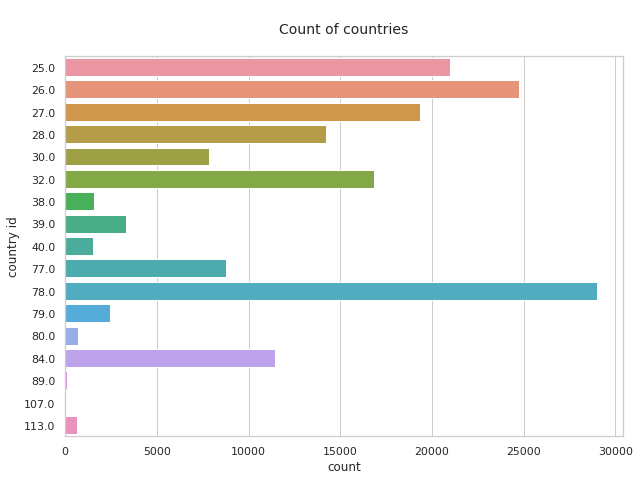

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y=a,x=b,orient='h')
plt.ylabel('country id',fontsize=12)
plt.xlabel('count',fontsize=12)
plt.title('\nCount of countries\n',fontsize=14)
plt.show()

In [ ]:
# ANOVA test
list_price, s_country, p =  anova_test('country')
s_country , p # showing significance

(264.9965482278862, 0.0)

In [ ]:
c = X_train[['country','status']].join(y_train)
c = c[c['status']=='Won']
p,q = np.unique(c.country.values, return_counts=True)
len(p) # all countries have status=Won(excluding nan)

17

In [ ]:
sort_index=np.argsort(q)[::-1] # sorting country count who have status=Won

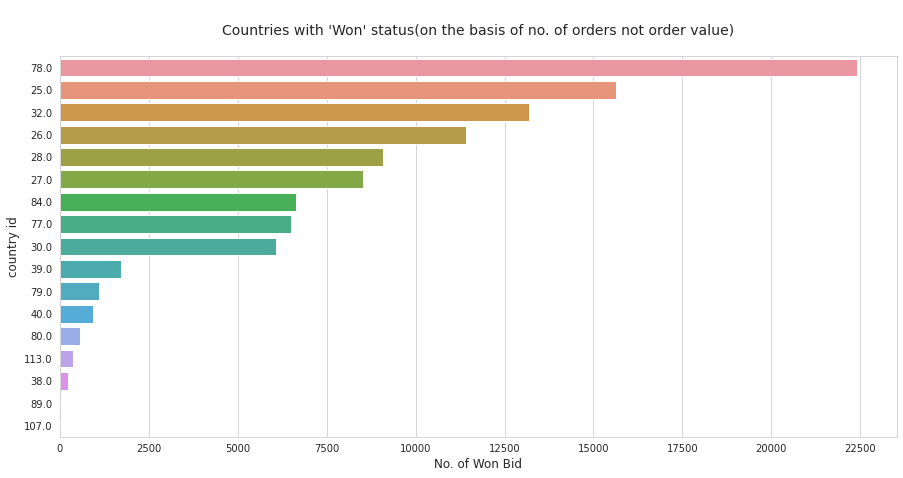

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y=p[sort_index],x=q[sort_index],order=p[sort_index],orient='h')
plt.xticks(np.arange(0,25000,2500))
plt.xlabel('No. of Won Bid',fontsize=12)
plt.ylabel('country id',fontsize=12)
plt.title("\nCountries with 'Won' status(on the basis of no. of orders not order value)\n",fontsize=14)
plt.show()

In [ ]:
country_sum=[]
for s in list_price:
 country_sum.append(int(np.sum(s)))
sort_index_sum=np.argsort(country_sum)[::-1]

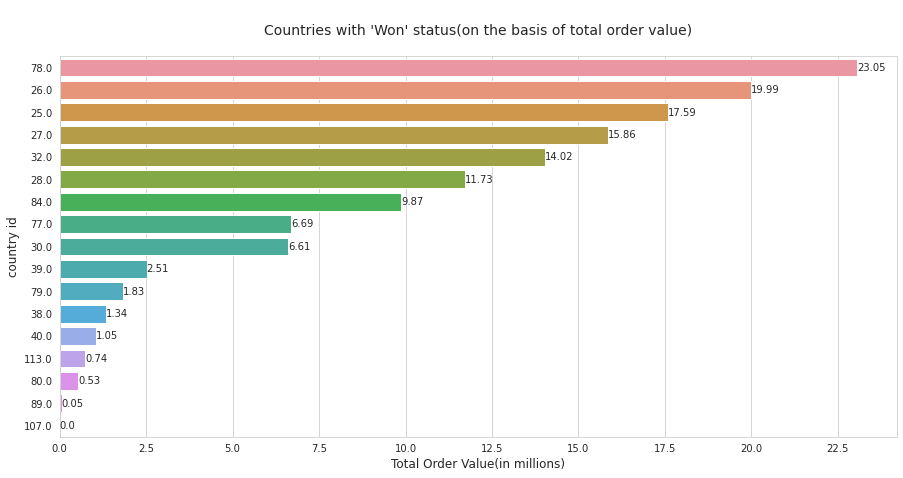

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(y=list_price.index[sort_index_sum],x=np.array(country_sum)[sort_index_sum],order=list_price.index[sort_index_sum],orient='h')
ax.bar_label(ax.containers[0],labels=np.around(np.array(country_sum)[sort_index_sum]/1e6 ,2))
plt.xticks(np.arange(0,25000000,2500000),labels=np.arange(0,25000000,2500000)/1e6)
plt.xlabel('Total Order Value(in millions)',fontsize=12)
plt.ylabel('country id',fontsize=12)
plt.title("\nCountries with 'Won' status(on the basis of total order value)\n",fontsize=14)
plt.show()

### <font color='blue'>Analysis of feature 'status':

**NOTE:**
- This feature seems to be a post-event feature.  i.e. after the offered price was calculated and bid was given, we have the result as 'Won','Lost' etc. So, while preparing the offer price this feature would be unknown.
- After getting further information from client we can decide whether to use this feature or not.
- For this assignment, using this feature in model as it is turning out to be most significant feature to get boost in r2 score but in real life may be eliminated after further discussion.

In [ ]:
X_train.status.value_counts()

Won                104431
Lost                31023
Not lost for AM     17526
Revised              3844
To be approved       3749
Draft                2825
Offered                48
Offerable               8
Wonderful               1
Name: status, dtype: int64

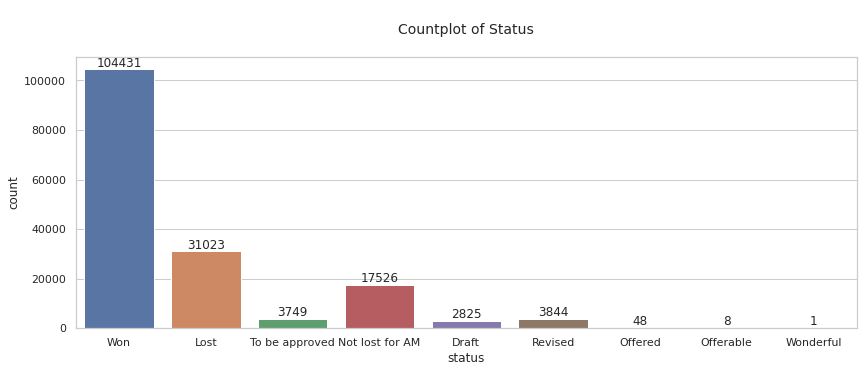

In [ ]:
plt.figure(figsize=(14,5))
ax=sns.countplot(x=X_train.status.values)
ax.bar_label(ax.containers[0])
plt.xlabel('status',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('\nCountplot of Status\n',fontsize=14)
plt.show()

In [ ]:
# ANOVA test
list_price, s_status, p =  anova_test('status')
s_status , p # this feature shows maximum significance

(6085.873256648186, 0.0)

In [ ]:
sell_sum=[]
for s in list_price.values:
 sell_sum.append(int(np.sum(s)))

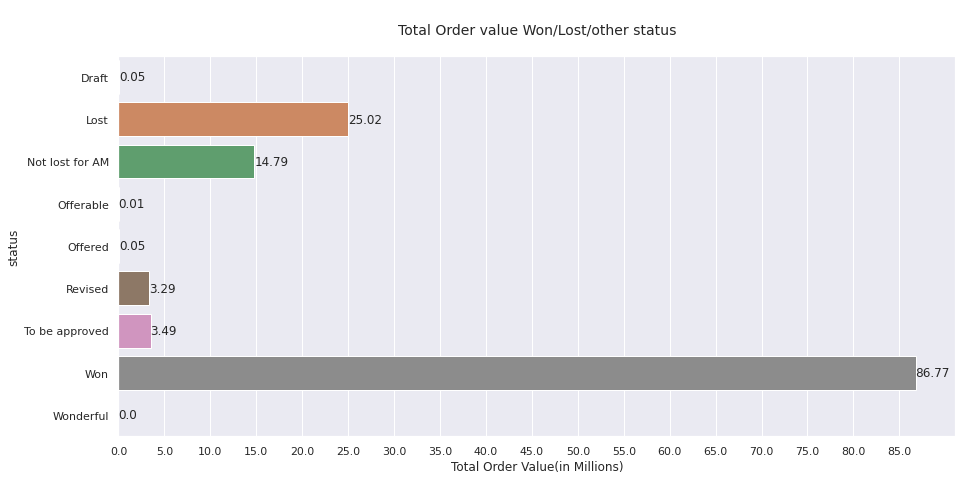

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(y=list_price.index,x=sell_sum,orient='h')
plt.xticks(np.arange(0,90e6,5e6),labels=np.arange(0,90,5))
ax.bar_label(ax.containers[0],labels=np.around(np.array(sell_sum)/1e6 ,2))
plt.xlabel('Total Order Value(in Millions)',fontsize=12)
plt.ylabel('status',fontsize=12)
plt.title("\nTotal Order value Won/Lost/other status\n",fontsize=14)
plt.show()

### <font color='blue'>Analysis of feature 'item type':

In [ ]:
X_train['item type'].value_counts()

W         95152
S         62180
PL         5079
Others      560
WI          461
IPL          24
SLAWR         1
Name: item type, dtype: int64

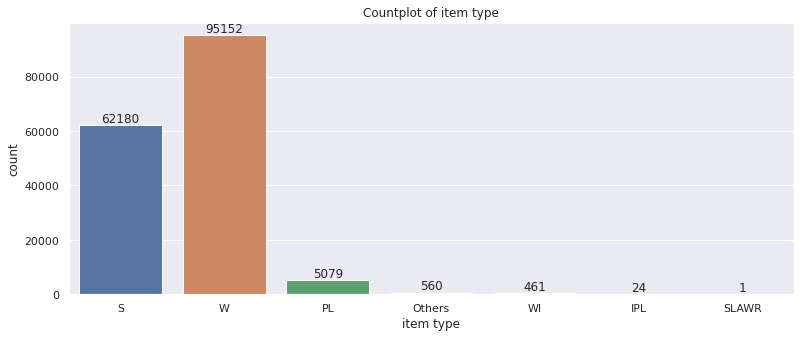

In [ ]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x=X_train['item type'].values)
ax.bar_label(ax.containers[0])
plt.xlabel('item type',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('Countplot of item type')
plt.show()

In [ ]:
# ANOVA test
list_price, s_itemtype, p =  anova_test('item type')
s_itemtype , p 

(340.1891300322109, 0.0)

In [ ]:
sell_sum=[]
for s in list_price.values:
 sell_sum.append(int(np.sum(s)))

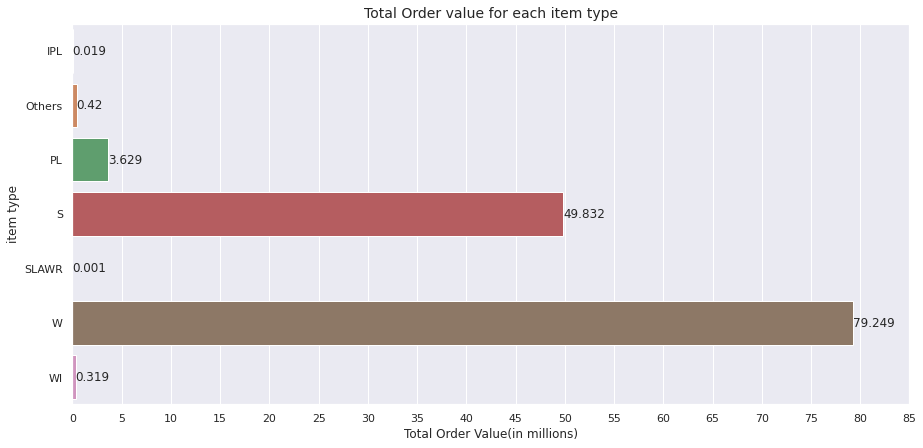

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(y=list_price.index,x=sell_sum,orient='h')
ax.bar_label(ax.containers[0],labels=np.around(np.array(sell_sum)/1e6,3))
plt.xticks(np.arange(0,90e6,5e6),labels=np.arange(0,90,5))
plt.xlabel('Total Order Value(in millions)',fontsize=12)
plt.ylabel('item type',fontsize=12)
plt.title("Total Order value for each item type",fontsize=14)
plt.show()

### <font color='blue'>Analysis of feature 'application':

Note: assuming this is a categorical feature.

In [ ]:
len(np.where(X_train['application'].isna().values==True)[0])

19

In [ ]:
X_train.application.value_counts()

10.0    69798
41.0    41690
15.0    18682
59.0     8054
42.0     5247
56.0     4343
29.0     1751
27.0     1610
26.0     1471
40.0     1430
28.0     1415
25.0     1334
79.0     1280
22.0      895
20.0      690
66.0      639
3.0       583
38.0      453
58.0      401
4.0       253
39.0      238
65.0      227
67.0      189
68.0      159
99.0      134
19.0      129
69.0      110
5.0       102
70.0       98
2.0        33
Name: application, dtype: int64

In [ ]:
len(X_train.application.unique())

31

In [ ]:
list_price, s_app, p = anova_test('application')
s_app,p

(656.9242238248592, 0.0)

### <font color='blue'>Analysis of feature 'thickness':

In [ ]:
len(np.where(X_train['thickness'].isna().values==True)[0])

1

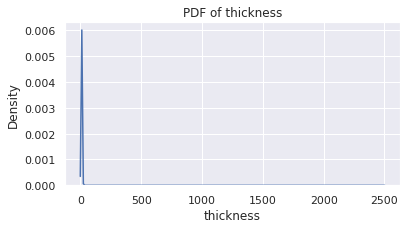

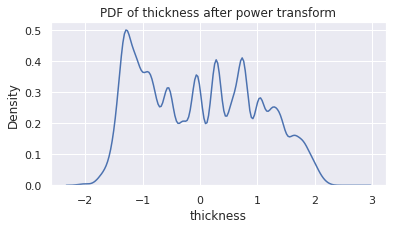

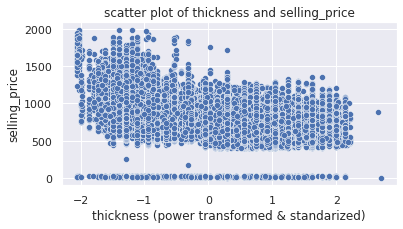

In [ ]:
plotting_continuous('thickness')

In [ ]:
np.quantile(X_train['thickness'].values,[0,0.25,0.5,0.75,0.9,0.99])

array([0.18, 0.70, 1.50, 3.00, 6.00, 14.99])

In [ ]:
res = stats.spearmanr(X_train['thickness'].values, y_train.values)
res

SignificanceResult(statistic=-0.4544652945244421, pvalue=0.0)

### <font color='blue'>Analysis of feature 'width':

In [ ]:
len(np.where(X_train['thickness'].isna().values==True)[0])

1

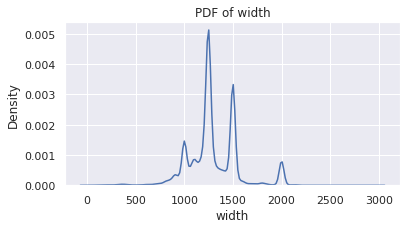

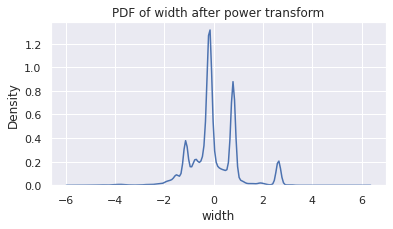

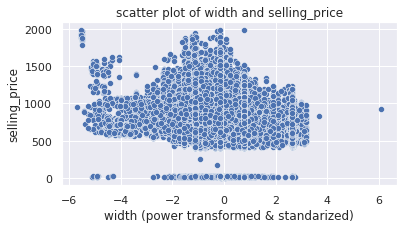

In [ ]:
plotting_continuous('width')

In [ ]:
np.quantile(X_train['width'].values,[0,0.25,0.5,0.75,0.9,0.99])

array([1.00, 1180.00, 1250.00, 1500.00, 1500.00, 2000.00])

In [ ]:
res = stats.spearmanr(X_train['width'].values, y_train.values)
res

SignificanceResult(statistic=-0.17123368250192247, pvalue=0.0)

### <font color='blue'>Analysis of feature 'material_ref':



In [ ]:
len(np.where(X_train['material_ref'].isna().values==True)[0]) # we see high no. of nan value

70094

In [ ]:
len(X_train['material_ref'].unique()) # we have 16092 unique values

16092

In [ ]:
list_sell,s_mtrl,p = anova_test('material_ref')
s_mtrl,p # significant, but less than others

(6.16330018567294, 0.0)

### <font color='blue'>Analysis of feature 'product_ref':

In [ ]:
len(np.where(np.isnan(X_train.product_ref.values)==True)[0])

0

In [ ]:
X_train.product_ref.value_counts()

611993        41194
164141591     25946
640665        24628
1670798778    16978
628377        16660
1668701718    13781
640405         8746
1671863738     4637
1332077137     4076
1693867550     1654
1668701376     1078
1671876026      746
628117          700
164337175       599
1668701698      341
1693867563      268
1282007633      250
1721130331      232
1665572374      185
628112          161
1690738206      131
1722207579      113
611728          108
640400           71
1668701725       50
164336407        43
611733           43
1690738219       17
1665572032       10
1665584320        8
1665584642        2
1665584662        1
Name: product_ref, dtype: int64

In [ ]:
len(X_train.product_ref.unique())

32

In [ ]:
list_sell,s_prodref,p = anova_test('product_ref')
s_prodref,p # high significant value

(1950.9155718223997, 0.0)